<a href="https://colab.research.google.com/github/jvictorferreira3301/Prob-Stat/blob/main/lab02.ipynb" target="_parent">
        <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" style="height: 27px; margin-right: 10px;"/>



## O problema:

Os dados referenciados abaixo mostram o diâmetro de Pizzas medidas na Austrália. A pizzaria EagleBoys afirma que suas pizzas são maiores do que as da pizzaria Dominos. Para provar isso, eles realizaram um conjunto de medições e as publicaram. Normalmente, não é esperado que cada pizza produzida por um restaurante tenha exatamente o mesmo tamanho, mas deve-se esperar algo próximo entre as pizzas produzidas. 

Veja que essa não é apenas uma história engraçada. O gerente de uma pizzaria precisa controlar custos e trazer clientela. Considerando duas pizzas de mesmo sabor, tipo de massa e preço, uma pizza maior significa menor lucro naquela pizza, enquanto que uma pizza menor do que o esperado implica em desagradar o cliente. Parece não haver uma estratégia única para determinar a medida certa para manter seu lucro, e isso dá origem à diferentes abordagens pelas pizzarias. Será que veremos estratégias diferentes nestes dados?

## O que fazer?

Agora você vai investigar os dados destas medições. Explore os dados usando o que você aprendeu e anote o que foi observado. Apresente um link de compartilhamento do seu colab, compartilhado para comentários. Ele deve conter código e texto explicativo.

## Questões motivadoras

As questões abaixo não são exaustivas, mas apenas um guia. Tente elaborar suas próprias questões ao analisar os dados.

Que tipos de variáveis temos no conjunto de dados?
Será que a alegação da pizzaria EagleBoys tem alguma base?
O tipo de massa (crust, em inglês) ou o sabor (topping, em inglês) impactam no tamanho da pizza?
Haveria alguma explicação para as diferenças?
Dados

https://github.com/glaucogoncalves/p-e/raw/main/Labs/lab-pizza/ujse_a_11889637_sm1111.zip

#### Mais sobre os dados e o problema

http://jse.amstat.org/v20n1/dunn.pdf


In [2]:
# importação das bibliotecas

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import os
import requests
import zipfile

Primeiramente, configuramos o download e descompactação dos dados de interesse:

In [3]:

# url do arquivo
url = "https://github.com/glaucogoncalves/p-e/raw/main/Labs/lab-pizza/ujse_a_11889637_sm1111.zip"
# nome
zip_path = "./data/ujse_a_11889637_sm1111.zip"
# pasta pra onde vai
extract_path = "./data"

# cria a pasta de destino se não existir
os.makedirs(extract_path, exist_ok=True)

# download do arquivo apenas se ele não existir
if not os.path.exists(zip_path):
    response = requests.get(url)
    with open(zip_path, 'wb') as file:
        file.write(response.content)

# descompacta o arquivo
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# remove o zip após a descompactação
os.remove(zip_path)

print("Download e descompactação concluídos.")

Download e descompactação concluídos.


### $I$. Inferências primárias

Fazemos algumas inferências primárias através da biblioteca pandas

In [4]:
data_pizza = pd.read_csv('data/pizzasize.csv')
data_pizza.describe()

,ID,Diameter
count,250.000000,250.000000
mean,125.972000,28.308200
std,72.941105,1.276376
min,1.000000,25.510000
25%,63.250000,26.885000
50%,125.500000,28.765000
75%,187.750000,29.237500
max,252.000000,31.060000


Na saída da célula acima podemos evidenciar a quantidade de pizzas medidas(`250`), a média do diâmetro (`28,3`) e os percentis dos mesmos. 

In [5]:
print(data_pizza.head(10))
print('\n')
print(data_pizza['Store'].unique())
print(data_pizza['CrustDescription'].unique())
print(data_pizza['Topping'].unique())


   ID      Store CrustDescription        Topping  Diameter
0   1    Dominos      ThinNCrispy        Supreme     29.40
1   2    Dominos      ThinNCrispy  BBQMeatlovers     29.63
2   3    Dominos          DeepPan       Hawaiian     27.06
3   4    Dominos      ThinNCrispy        Supreme     27.45
4   5    Dominos     ClassicCrust       Hawaiian     26.59
5   6    Dominos          DeepPan  BBQMeatlovers     27.16
6   7  EagleBoys         MidCrust   SuperSupremo     29.15
7   8  EagleBoys          DeepPan       Hawaiian     28.78
8   9  EagleBoys        ThinCrust  BBQMeatlovers     30.05
9  10  EagleBoys          DeepPan  BBQMeatlovers     29.38


['Dominos' 'EagleBoys']
['ThinNCrispy' 'DeepPan' 'ClassicCrust' 'MidCrust' 'ThinCrust']
['Supreme' 'BBQMeatlovers' 'Hawaiian' 'SuperSupremo']


Vemos acima as nossas variáveis representadas pelas colunas. 

Podemos ver 3 variaveis categóricas e seus valores distintos que podem ser assumidos, que também podemos entender como o suporte das nossas VAs:
- `Store` : As duas pizzarias em questão.
- `CrustDescription` : Os tipos de massa.
- `Topping`: Os sabores.

E uma variável numérica, tendo em seu suport entre 25.51 e 31.06:

- `Diameter`: $25.51<x<31.06$

In [6]:
print(data_pizza.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                250 non-null    int64  
 1   Store             250 non-null    object 
 2   CrustDescription  250 non-null    object 
 3   Topping           250 non-null    object 
 4   Diameter          250 non-null    float64
dtypes: float64(1), int64(1), object(3)
memory usage: 9.9+ KB
None


## Será que a alegação da pizzaria EagleBoys tem alguma base?

Para avaliar se a afirmação da pizzaria EagleBoys faz sentido vamos calcular na célula abaixo a média do diâmetro (variável `Diameter`) das pizzas medidas de cada pizzaria (variável `Store`)

In [7]:
# Compare the average diameter of pizzas from different stores
mean_diameter_by_store = data_pizza.groupby('Store')['Diameter'].mean()
print(mean_diameter_by_store)

Store
Dominos      27.44208
EagleBoys    29.17432
Name: Diameter, dtype: float64


Como podemos visualizar, de fato, em média a pizzaria EagleBoys tem pizzas com diâmetros maiores, fato que corrobora a alegação.

Para vermos essa superioridade de maneira mais visual podemos plotar um _boxplot_ com a distribuição dos diâmetros das pizzas por pizzaria:

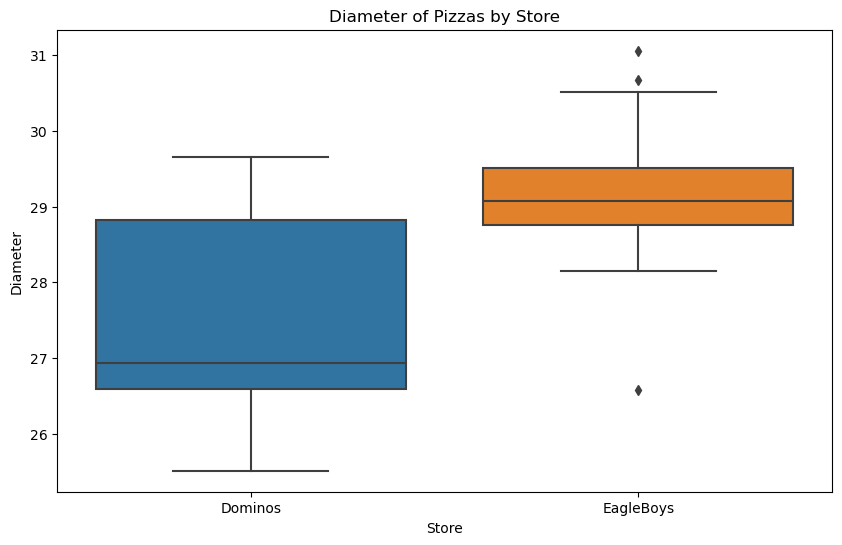

In [8]:
# Boxplot do diametro pela pizzaria
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store', y='Diameter', data=data_pizza)
plt.title('Diameter of Pizzas by Store')
plt.show()

## O tipo de massa ou o sabor impactam no tamanho da pizza?


In [9]:
# Compare the average diameter by crust type
mean_diameter_by_crust = data_pizza.groupby('CrustDescription')['Diameter'].mean()
print(mean_diameter_by_crust)


CrustDescription
ClassicCrust    26.753333
DeepPan         27.933012
MidCrust        28.782093
ThinCrust       29.700513
ThinNCrispy     28.814419
Name: Diameter, dtype: float64


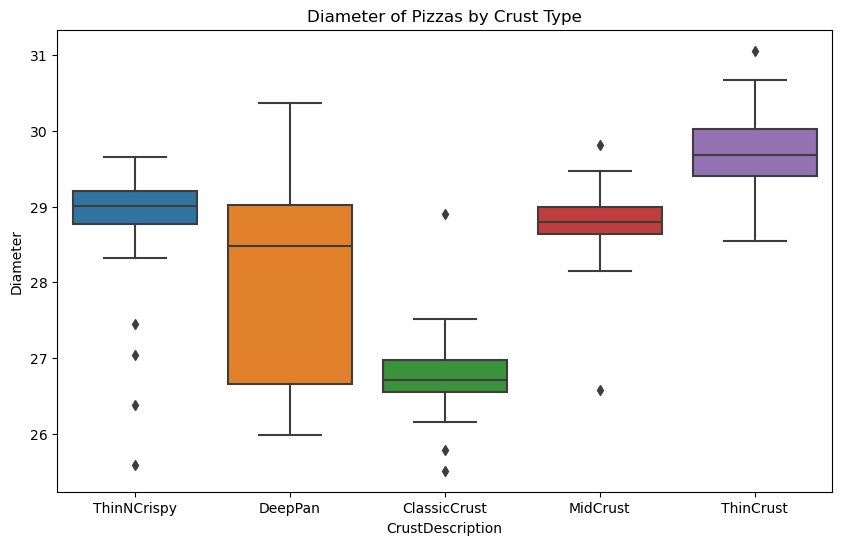

In [10]:
# Boxplot for diameter by crust type
plt.figure(figsize=(10, 6))
sns.boxplot(x='CrustDescription', y='Diameter', data=data_pizza)
plt.title('Diameter of Pizzas by Crust Type')
plt.show()

In [11]:
mean_diameter_by_topping = data_pizza.groupby('Topping')['Diameter'].mean()
print(mean_diameter_by_topping)

Topping
BBQMeatlovers    28.251059
Hawaiian         28.309048
SuperSupremo     29.147000
Supreme          27.606585
Name: Diameter, dtype: float64


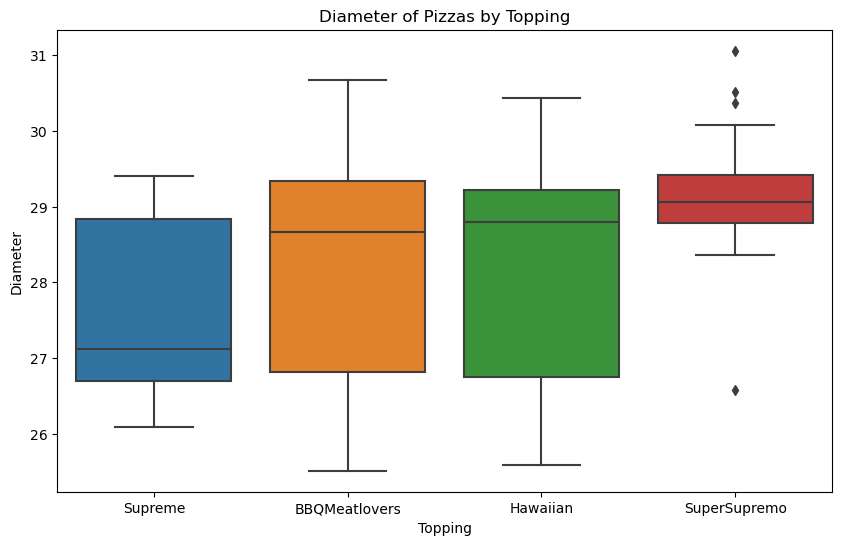

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Topping', y='Diameter', data=data_pizza)
plt.title('Diameter of Pizzas by Topping')
plt.show()


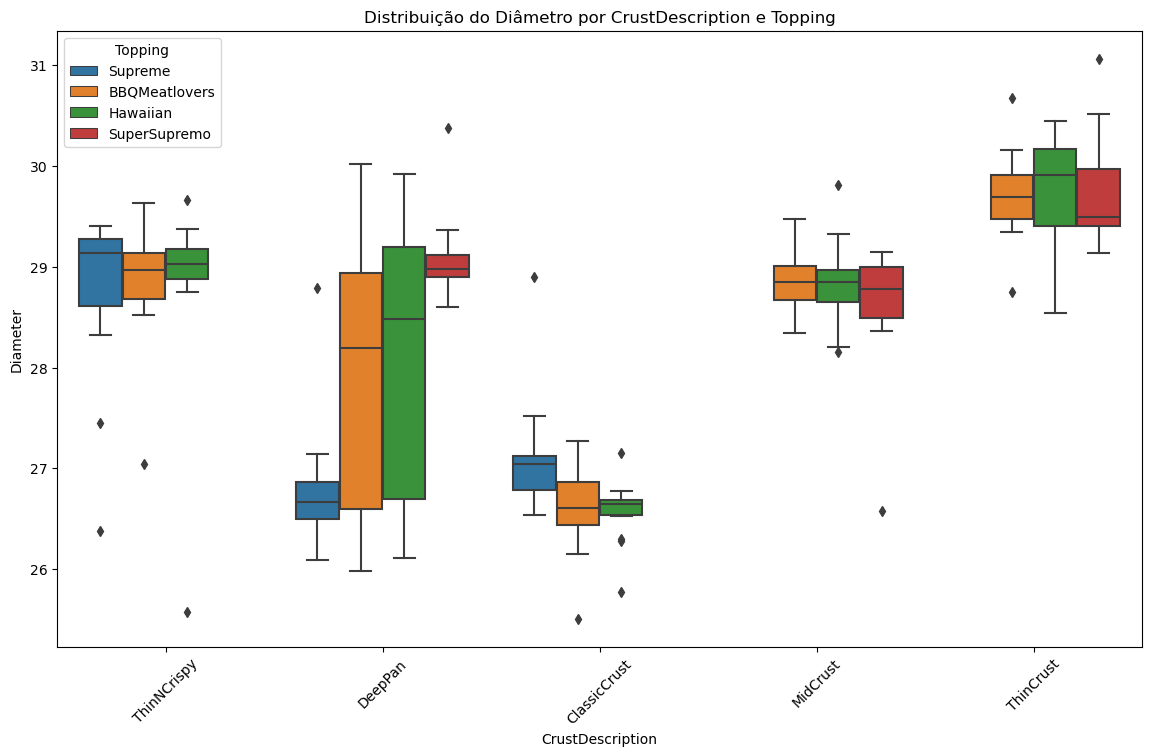

In [13]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_pizza, x='CrustDescription', y='Diameter', hue='Topping')
plt.title('Distribuição do Diâmetro por CrustDescription e Topping')
plt.xticks(rotation=45)
plt.show()

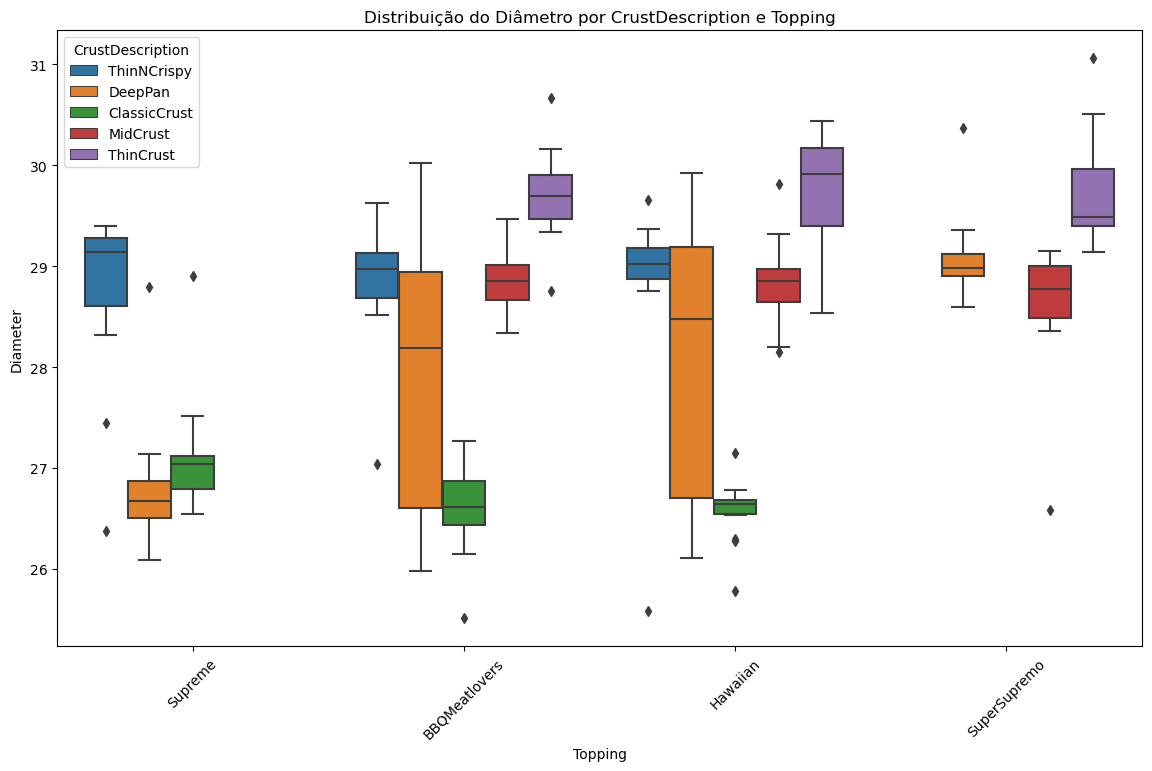

In [14]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=data_pizza, x='Topping', y='Diameter', hue='CrustDescription')
plt.title('Distribuição do Diâmetro por CrustDescription e Topping')
plt.xticks(rotation=45)
plt.show()